# Kaggle - WiDS Datathon 2022

## Modelo Nº4

### Description:

- All the features
- Separation train/test - 80/20
- Catboost
- Hiperparameters by default
- Cross validation
- Long value of iterations: 10000

- Public Score = XXX

# 1. Modules

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#model
from catboost import CatBoostRegressor

#train/test split
from sklearn.model_selection import train_test_split

#pool class
from catboost import Pool

#cross validation
from catboost import cv

# 2. Data

In [2]:
#paths to the Github repo

train_path = 'https://raw.githubusercontent.com/ccollado7/wds-datathon-2022/main/data/raw/train.csv'
test_path = 'https://raw.githubusercontent.com/ccollado7/wds-datathon-2022/main/data/raw/test.csv'
submit_path = 'https://raw.githubusercontent.com/ccollado7/wds-datathon-2022/main/data/raw/sample_solution.csv'

In [3]:
#train dataset

train = pd.read_csv(train_path)
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [4]:
#test dataset

test = pd.read_csv(test_path)
test.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


In [5]:
#sumbit

submit = pd.read_csv(submit_path)
submit.head()

,id,site_eui
0,75757,0.0
1,75758,0.0
2,75759,0.0
3,75760,0.0
4,75761,0.0


In [6]:
x = train.drop(['id','site_eui'], axis=1)
x.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [7]:
y = train['site_eui']

In [8]:
cat_features = list(train.select_dtypes(include=['object']).columns)
cat_features

['State_Factor', 'building_class', 'facility_type']

In [9]:
#train / validation split
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=0)

#train pool
train_pool = Pool(
    data=x_train, 
    label=y_train, 
    cat_features=cat_features
)

#validation pool
validation_pool = Pool(
    data=x_validation, 
    label=y_validation, 
    cat_features=cat_features
)

### Model 4

In [15]:
#params definition
params = {
    'loss_function': 'RMSE',
    'iterations': 10000,
}

#cross validation proces
cv_data_4 = cv(
    params = params,
    pool = train_pool,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 41.27143715
bestIteration = 9996

Training on fold [1/5]

bestTest = 43.82080798
bestIteration = 9972

Training on fold [2/5]

bestTest = 40.08128386
bestIteration = 9995

Training on fold [3/5]

bestTest = 42.33817104
bestIteration = 9998

Training on fold [4/5]

bestTest = 42.04064629
bestIteration = 9978



In [16]:
cv_data_4.head()

,iterations,test-RMSE-mean,test-RMSE-std,train-RMSE-mean,train-RMSE-std
0,0,98.651933,1.080602,98.655580,0.263603
1,1,96.613488,1.091156,96.617078,0.265360
2,2,94.639519,1.092093,94.641809,0.274818
3,3,92.755890,1.104803,92.758181,0.274505
4,4,90.948180,1.114655,90.948868,0.277208


In [17]:
best_value = np.min(cv_data_4['test-RMSE-mean'])
best_iter = np.argmin(cv_data_4['test-RMSE-mean'])

print('Best validation RMSE score, not stratified: {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data_4['test-RMSE-std'][best_iter],
    best_iter)
)

Best validation RMSE score, not stratified: 41.9114±1.3792 on step 9984


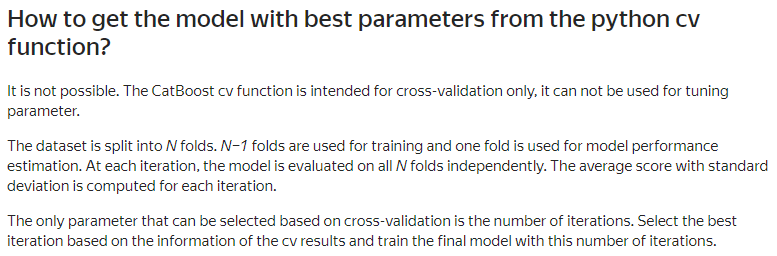

As you can see, the iteration value that corresponds to the best RMSE score in validation (using CV) coincides with the iteration value found in models 2 and 3

In [21]:
model_4 = CatBoostRegressor(
    iterations= best_iter
)

model_4.fit(
    train_pool,
    eval_set=validation_pool,
    verbose=False,
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [24]:
x_test = test.drop('id', axis=1)
x_test.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [25]:
submit['site_eui'] = model_4.predict(x_test)
submit.to_csv('modelo_4.csv',index=False)